# **7-4 달 착륙선 모델 만들어보기**

📌[실습 7-34] 필요한 외부 라이브러리 설치하기

In [1]:
!pip install swig
!pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398998 sha256=9d83ac771b54a8142c18239ad6d9b4fdc06072784f0f7923fac1d74a3ccc4194
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


📌[실습 7-35] 달 착륙선-v3 환경을 정의하고 상태 초기화하기

In [7]:
import gymnasium as gym
import numpy as np

env = gym.make("LunarLander-v3", render_mode="rgb_array")
# 상태 초기화
상태, _ = env.reset()
print("초기 상태=", np.round(상태, 3))

초기 상태= [-0.005  1.422 -0.472  0.471  0.005  0.107  0.     0.   ]


📌[실습 7-36] 상태 변화를 GIF 형태로 시각화하기 - 달 착륙선-v3 환경

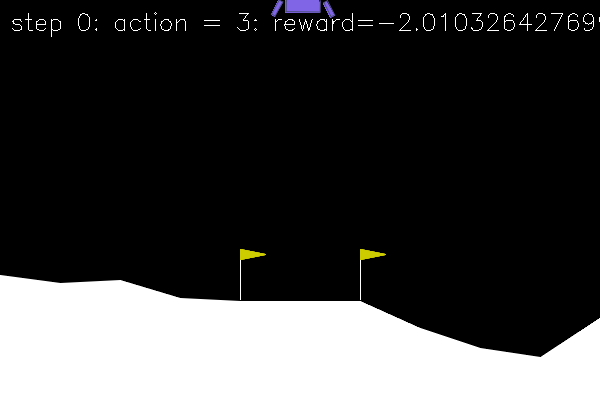

In [13]:
import imageio; import cv2; from IPython.display import Image    # 시각화 라이브러리

# 환경 생성
env = gym.make("LunarLander-v3", render_mode="rgb_array")
상태, _ = env.reset();

frames = []

# 무작위 행동을 수행하면서 프레임 수집
for step in range(1000):
    행동=np.random.randint(0, 4)    # 0에서 3 사이의 정수를 무작위 선택
    상태, 보상, terminated, truncated, _ = env.step(행동)
    종료=terminated or truncated

    frame = env.render()
    frame = frame.copy()

    # OpenCV로 텍스트 삽입
    텍스트_삽입 = cv2.putText(
        frame,                                              # 원본 이미지 복사
        f"step {step}: action = {행동}: reward={보상}",
                org=(10, 30),                               # 텍스트 위치
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.8, color=(255, 255, 255), thickness=1)  # 글자크기와 색상 조정
    frames.append(텍스트_삽입)
    if 종료:
        break
env.close()

# GIF 형식으로 저장하고 출력하기
imageio.mimsave("lunar.gif", frames, duration=0.2)
Image(filename="lunar.gif")